# House Sales Analysis for House Hocket 

## 0.0 Business Problem 

A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.
 
O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguintes perguntas:

- Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
- Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
- A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?


Para responder essas perguntas, num primeiro momento farei uma boa análise exploratória dos dados, a fim de ganhar insights que além de responder alguma das perguntas, ajudará a enxergar outros pontos que talvez equipe de negócio não sabia antes. 

Posteriormente, será será ajustado um modelo linear para aderessar questões quantitativas, como o incremento de preço. 

O modelo linear foi escolhido, pois ele é paramétrico e parte de um problema de otimização, permitindo observar a importância de cada variável no incremento de preço (podemos saber quanto, em média, o preço aumenta por cada aumento da unidade da variável).

### 0.1 Dataset Features 

- **id** :a notation for a house

- **date**: Date house was sold

- **price**: Price is prediction target

- **bedrooms**: Number of Bedrooms/House

- **bathrooms**: Number of bathrooms/bedrooms

- **sqft_living**: square footage of the home

- **sqft_lot**: square footage of the lot

- **floors** :Total floors (levels) in house

- **waterfront** :House which has a view to a waterfront

- **view**: Has been viewed

- **condition** :How good the condition is Overall

- **grade**: overall grade given to the housing unit, based on King County grading system

- **sqft_above** :square footage of house apart from basement

- **sqft_basement**: square footage of the basement

- **yr_built** :Built Year

- **yr_renovated** :Year when house was renovated

- **ipcode**:zip code

- **lat**: Latitude coordinate

- **long**: Longitude coordinate

- **sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

- **sqft_lot15** :lotSize area in 2015(implies-- some renovations)

### 0.2 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display       import Image
from IPython.core.display  import HTML

### 0.3 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'seaborn-pastel' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:70% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    sns.set_style('whitegrid')
    
def get_summary(numerical_attributes):
    
    # Central Tendency - mean, meadina 
    ct1 = pd.DataFrame( numerical_attributes.apply( np.mean ) ).T
    ct2 = pd.DataFrame( numerical_attributes.apply( np.median ) ).T

    # dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( numerical_attributes.apply( np.std ) ).T 
    d2 = pd.DataFrame( numerical_attributes.apply( min ) ).T 
    d3 = pd.DataFrame( numerical_attributes.apply( max ) ).T 
    d4 = pd.DataFrame( numerical_attributes.apply( lambda x: x.max() - x.min() ) ).T 
    d5 = pd.DataFrame( numerical_attributes.apply( lambda x: x.skew() ) ).T 
    d6 = pd.DataFrame( numerical_attributes.apply( lambda x: x.kurtosis() ) ).T 

    # concatenar
    m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return m

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### 0.4 Load Data

In [4]:
df = pd.read_csv('data/kc_house_data.csv', parse_dates = ['date'])

## 1.0 Describe Data

In [5]:
df1 = df.copy()

In [6]:
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00,2014-05-12 00:00:00,2014-06-27 00:00:00,2015-01-15 00:00:00,2015-04-15 00:00:00,2015-03-12 00:00:00
price,221900.0000,538000.000,180000.0000,604000.0000,510000.0000,1225000.0000,257500.0000,291850.0000,229500.0000,323000.0000
bedrooms,3,3,2,4,3,4,3,3,3,3
bathrooms,1.0000,2.250,1.0000,3.0000,2.0000,4.5000,2.2500,1.5000,1.0000,2.5000
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560
floors,1.0000,2.000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0


In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})

cons['percentual'] = round(cons['missing'] / cons['size'],2)

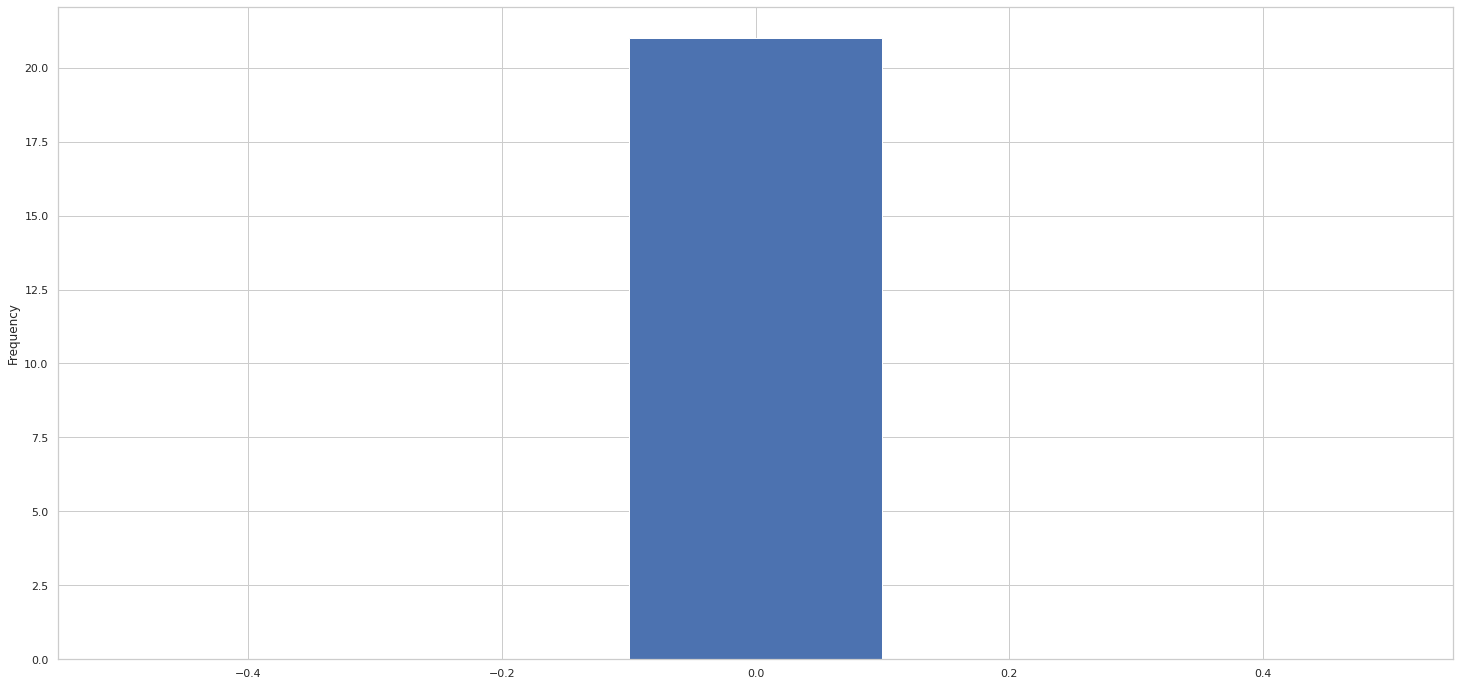

In [10]:
cons.percentual.plot.hist( bins = 5);

**Não existem dados faltantes no dataset**

In [11]:
df_aux = df1.drop(['id','date','lat','long', 'zipcode'], axis='columns')

num_attributes = df_aux.select_dtypes( include=['int64', 'float64'] )

In [12]:
get_summary(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.0,7700000.0,7625000.0,540088.141767,450000.00,367118.703181,4.024069,34.585540
1,bedrooms,0.0,33.0,33.0,3.370842,3.00,0.930040,1.974300,49.063653
2,bathrooms,0.0,8.0,8.0,2.114757,2.25,0.770145,0.511108,1.279902
3,sqft_living,290.0,13540.0,13250.0,2079.899736,1910.00,918.419649,1.471555,5.243093
4,sqft_lot,520.0,1651359.0,1650839.0,15106.967566,7618.00,41419.553273,13.060019,285.077820
5,floors,1.0,3.5,2.5,1.494309,1.50,0.539976,0.616177,-0.484723
6,waterfront,0.0,1.0,1.0,0.007542,0.00,0.086515,11.385108,127.632494
7,view,0.0,4.0,4.0,0.234303,0.00,0.766300,3.395750,10.893022
8,condition,1.0,5.0,4.0,3.409430,3.00,0.650728,1.032805,0.525764
9,grade,1.0,13.0,12.0,7.656873,7.00,1.175432,0.771103,1.190932


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

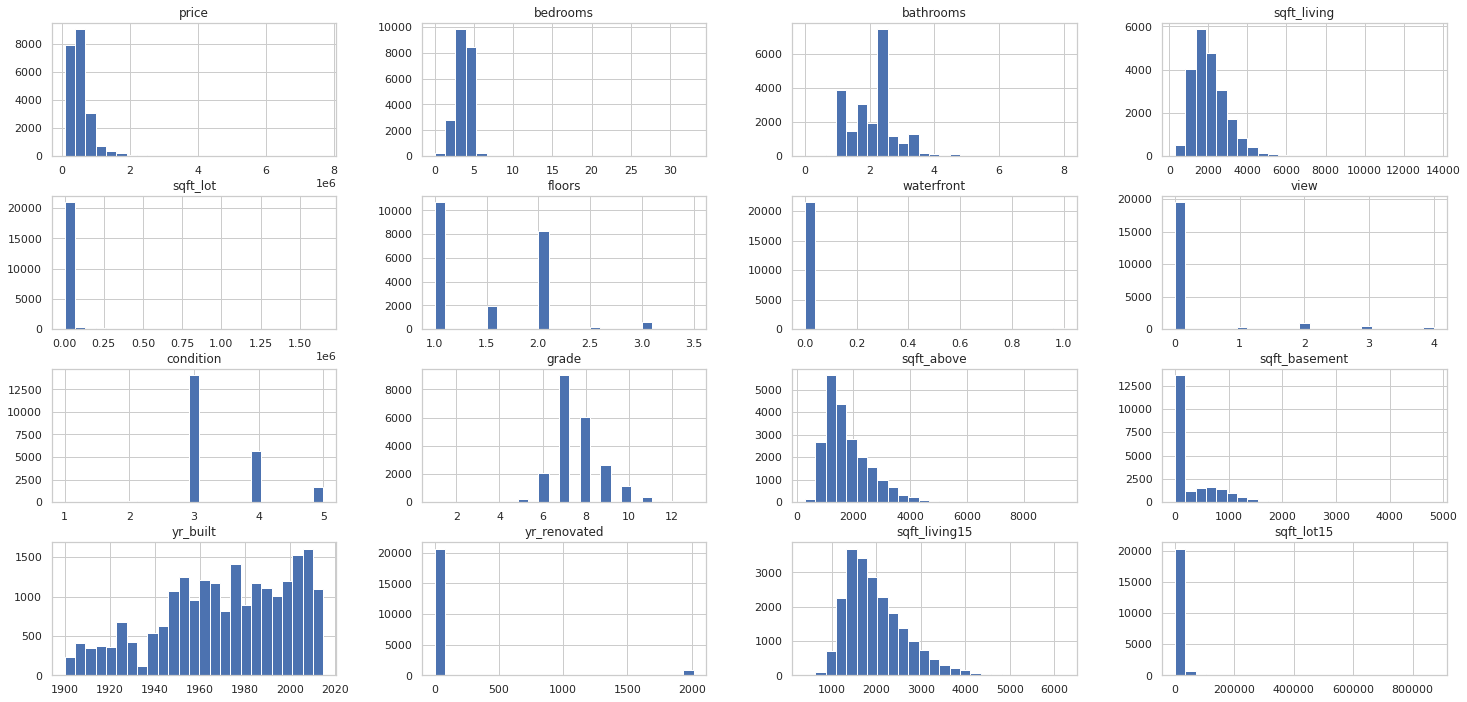

In [13]:
num_attributes.hist(bins = 25)

**Target**

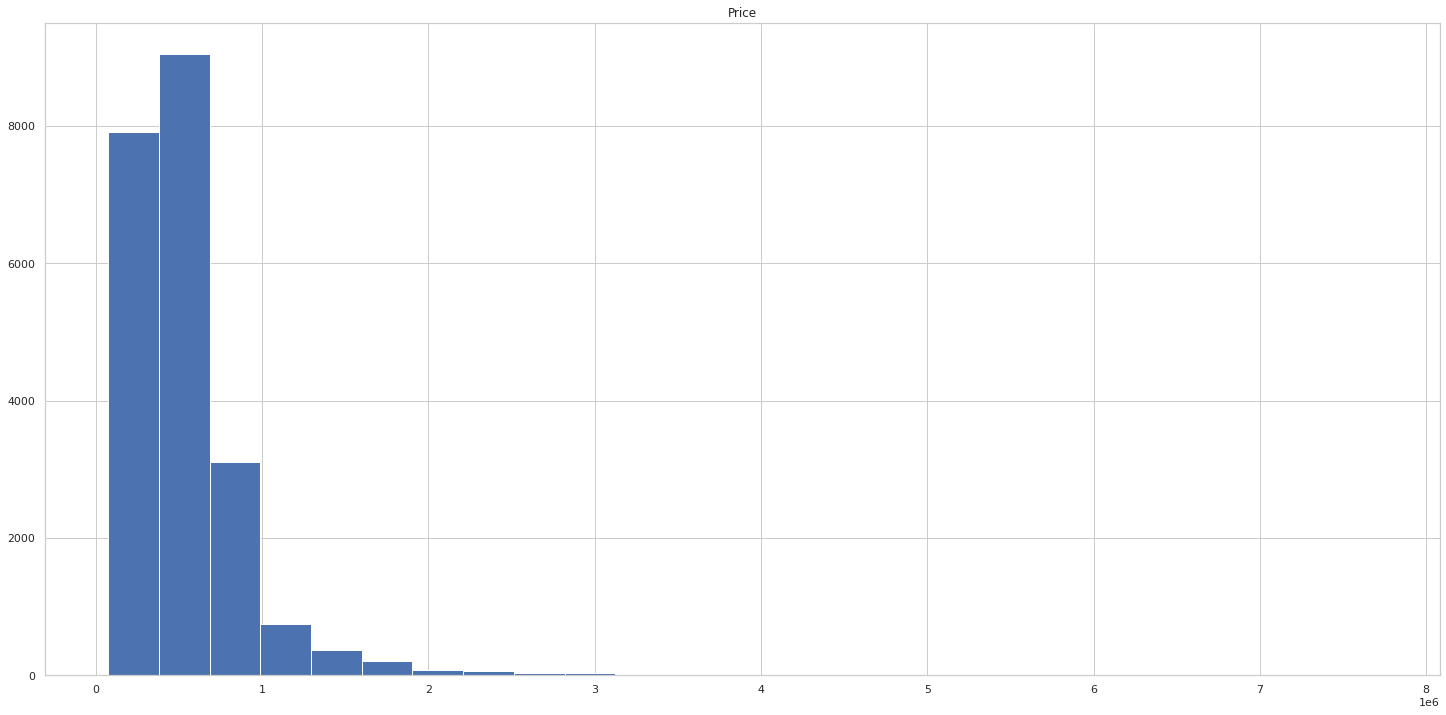

In [14]:
df['price'].hist(bins = 25)
plt.title('Price')
plt.show()

/home/jvbf/anaconda3/envs/house-sales/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

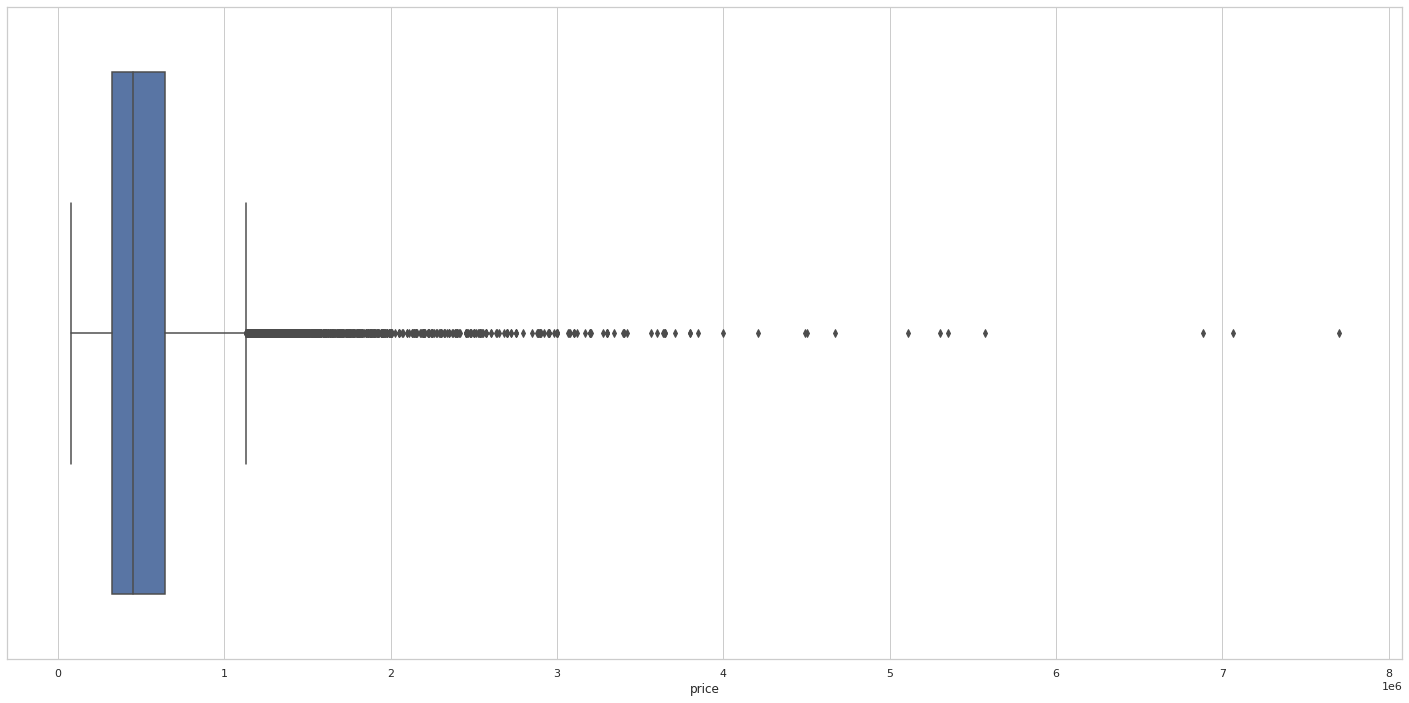

In [15]:
sns.boxplot(df['price'])

**Categorical**

In [16]:
df1['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

## 2.0 Feature Engineering

In [17]:
df1 = df.copy()

### 2.1 Month and Year

In [18]:
df1['year'] = pd.DatetimeIndex(df['date']).year
df1['month'] = pd.DatetimeIndex(df['date']).month

In [19]:
month_dict = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr' , 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

df1['month'] = df1['month'].map(month_dict)

## 3.0 Exploratory Data Analysis

In [22]:
df2 = df1.copy()

**Variação do preço por número de quartos, banheiros e andares**

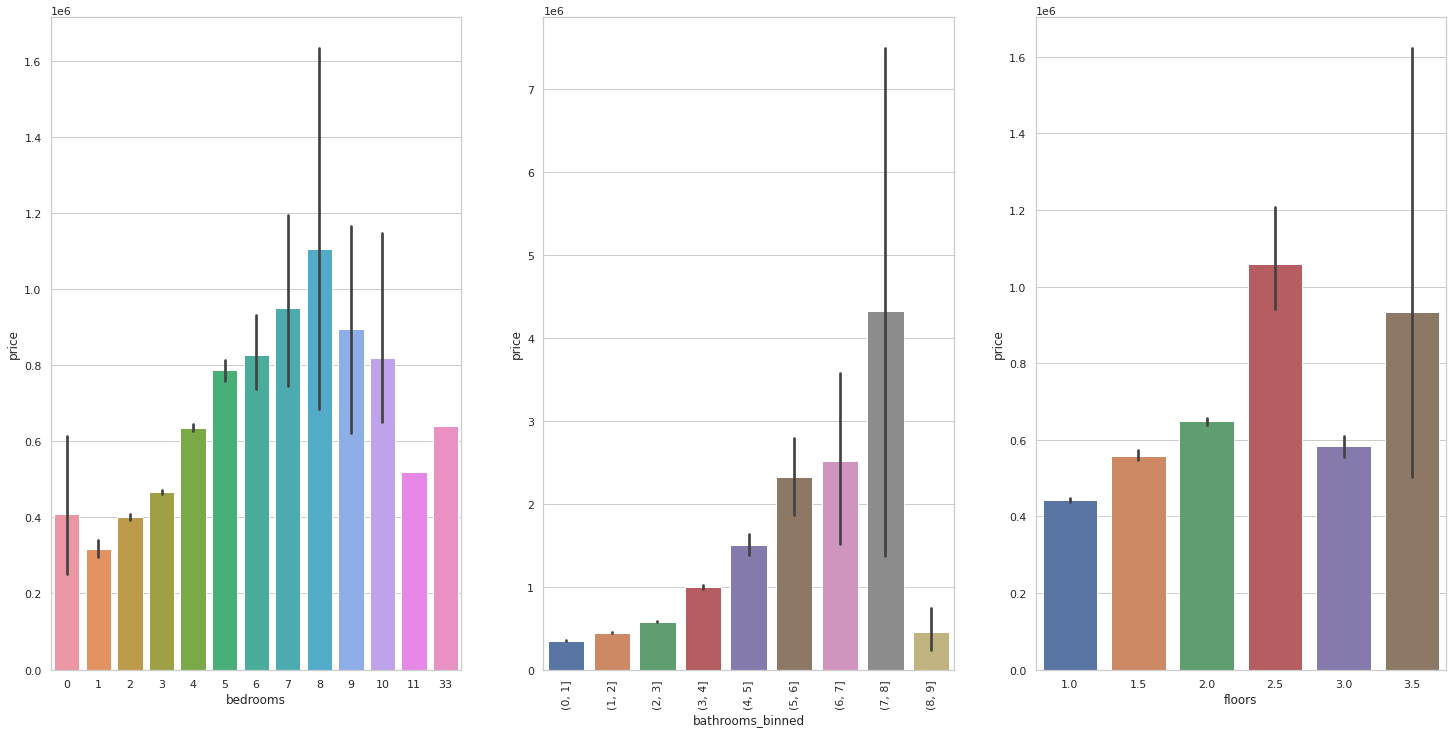

In [23]:
plt.subplot(1,3,1)
sns.barplot(x = 'bedrooms', y = 'price', data = df2)

plt.subplot(1,3,2)
bins = list( np.arange( 0, 10, 1))
aux1 = df2.copy()
aux1['bathrooms_binned'] = pd.cut( df2['bathrooms'], bins = bins )
sns.barplot(x = 'bathrooms_binned', y = 'price', data = aux1);
plt.xticks( rotation=90 );

plt.subplot(1,3,3)
sns.barplot(x = 'floors', y = 'price', data = df2);

**Waterfront**

<AxesSubplot:xlabel='waterfront', ylabel='price'>

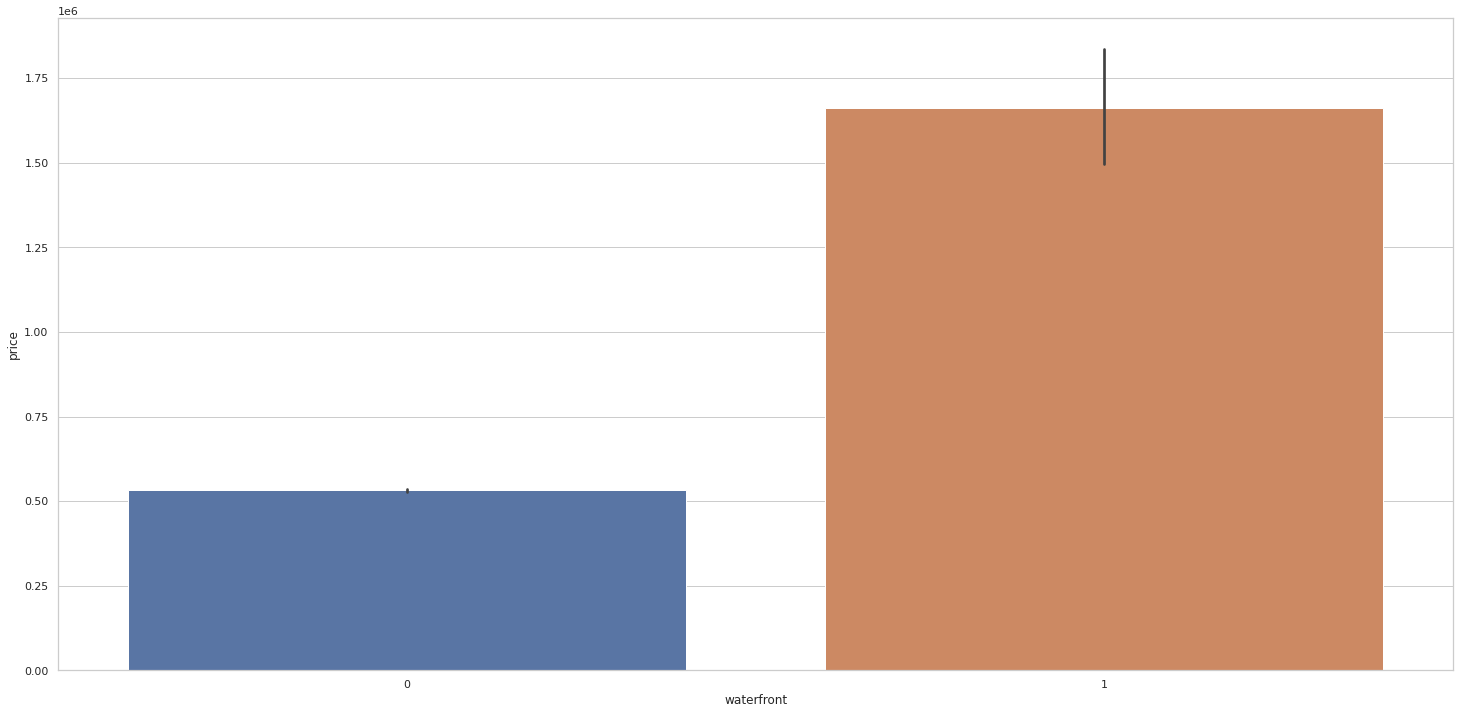

In [24]:
sns.barplot(x = 'waterfront', y = 'price', data = df2)

Residências na beira-mar, como esperado, são normalmente mais caras

**Square feet living / lot**

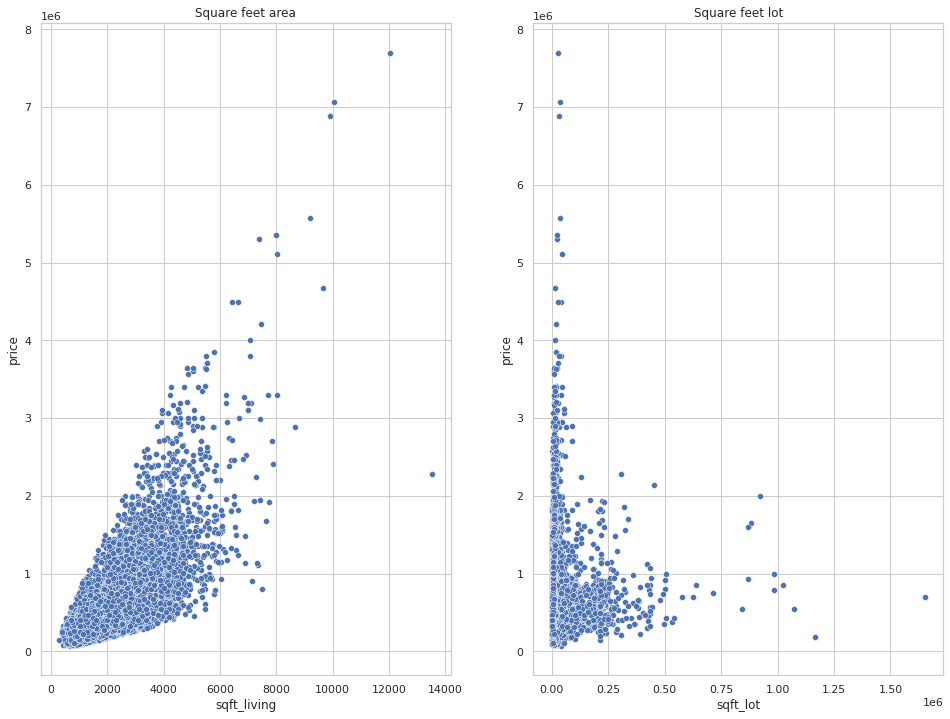

In [25]:
plt.subplot(1,3,1)
plt.title('Square feet area')
sns.scatterplot(x = 'sqft_living', y = 'price', data = df2)

plt.subplot(1,3,2)
plt.title('Square feet lot')
sns.scatterplot(x = 'sqft_lot', y = 'price', data = df2);

Há uma forte correlação positiva entre a área de casa e seu preço, porém, essa relação não é tão clara quando considerada a área do lote. 

**Sales and time**

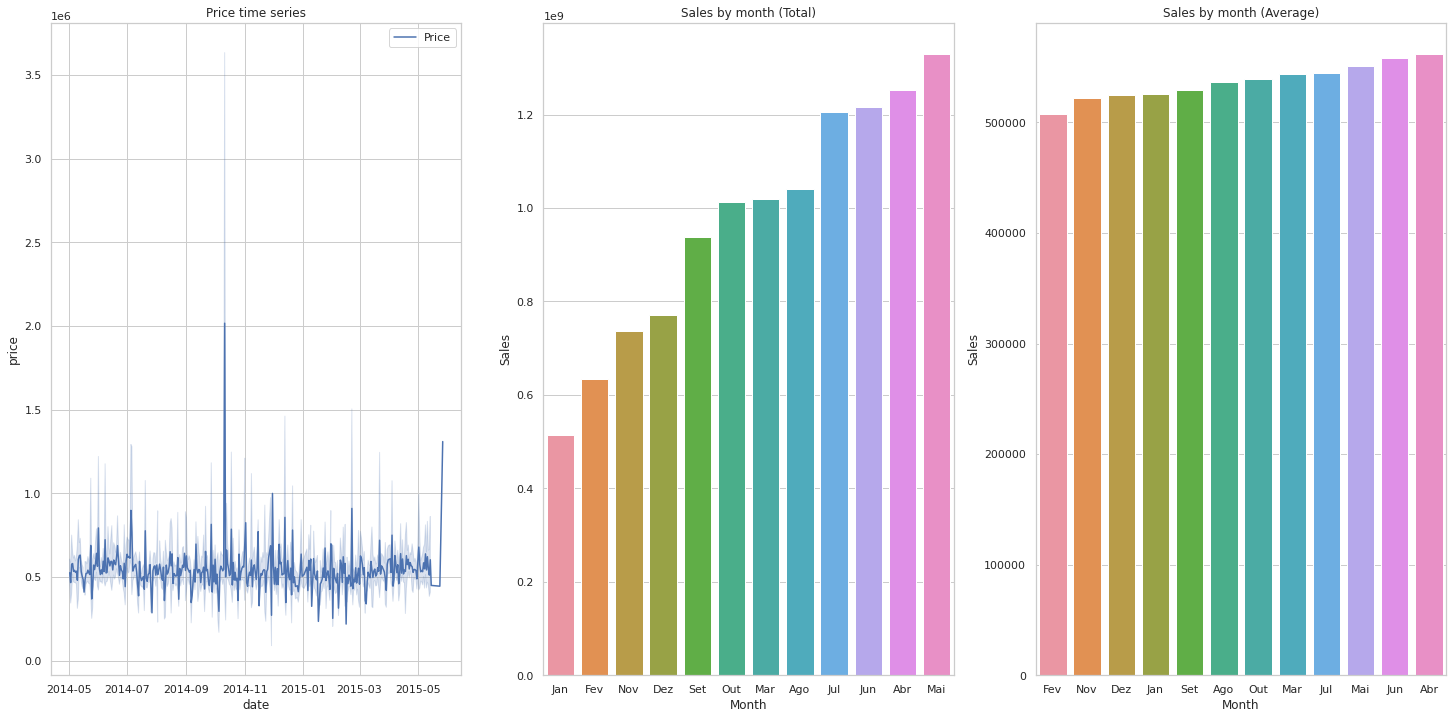

In [31]:
plt.subplot(1,3,1)
sns.lineplot( x='date', y='price', data=df2, label='Price' )
plt.title('Price time series')


plt.subplot(1,3,2)
aux2 = df2[['price', 'month']].groupby('month').sum().reset_index()
sns.barplot( x='month', y='price', data=aux2.sort_values(['price']), label='Price' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by month (Total)');

plt.subplot(1,3,3)
aux3 = df2[['price', 'month']].groupby('month').mean().reset_index()
sns.barplot( x='month', y='price', data=aux3.sort_values(['price']), label='Price' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by month (Average)');

No varejo, normalmente as vendas são mais aquecidas no final do ano, nos mêses de Novembro e Dezembro. Vemos que o mercado de imóveis foge um pouco dessa regra, tendo **vendas médias maiores no começo para meio do ano, especificamente em Abril, Maio junho e Julho.** 

In [32]:
df2['month'].value_counts()

Mai    2414
Abr    2231
Jul    2211
Jun    2180
Ago    1940
Out    1878
Mar    1875
Set    1774
Dez    1471
Nov    1411
Fev    1250
Jan     978
Name: month, dtype: int64

In [47]:
aux3.rename(columns = {'month':'Mês', 'price':'Média de vendas'}, inplace = True)
aux3.sort_values(by = ['Média de vendas'], ascending = False)

,Mês,Média de vendas
0,Abr,561837.774989
6,Jun,558002.199541
7,Mai,550768.785833
5,Jul,544788.764360
8,Mar,543977.187200
10,Out,539026.971778
1,Ago,536445.276804
11,Set,529253.821871
4,Jan,525870.889571
2,Dez,524461.866757


Alguns meses vendem menos, porém casas mais caras, o que, na média, faz com que todos os meses tenham um volume de venda aproximado, em torno de 500 mil por casa. Entretanto, **separaremos o dataset entre preços altos e baixos**, para tentar entender que mês vende casas mais caras ou mais baratas

In [48]:
df2['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Vemos que a mediana de preço é 450 mil dólares, valor que divide o conjunto de dados ordenados pelo preço ao meio. 

- 25% dos maiores valores são maiores que 645 mil dólares > **este será o conjunto de 'preços altos'**
- 25% dos menores valores são menores que 322 mil dólares > **este será o conjunto de 'preços baixos'**

In [70]:
aux_high_price = df2[df2['price'] > 644999] 
aux_high_price['price'].describe()

count    5.413000e+03
mean     9.850090e+05
std      4.758143e+05
min      6.450000e+05
25%      7.200000e+05
50%      8.250000e+05
75%      1.050000e+06
max      7.700000e+06
Name: price, dtype: float64

In [71]:
aux_low_price = df2[df2['price'] < 322000] 
aux_low_price['price'].describe()

count      5404.000000
mean     251557.649889
std       48269.362890
min       75000.000000
25%      220000.000000
50%      259000.000000
75%      290000.000000
max      321950.000000
Name: price, dtype: float64

**High Price**

Text(0.5, 1.0, 'Sales by month (Average)')

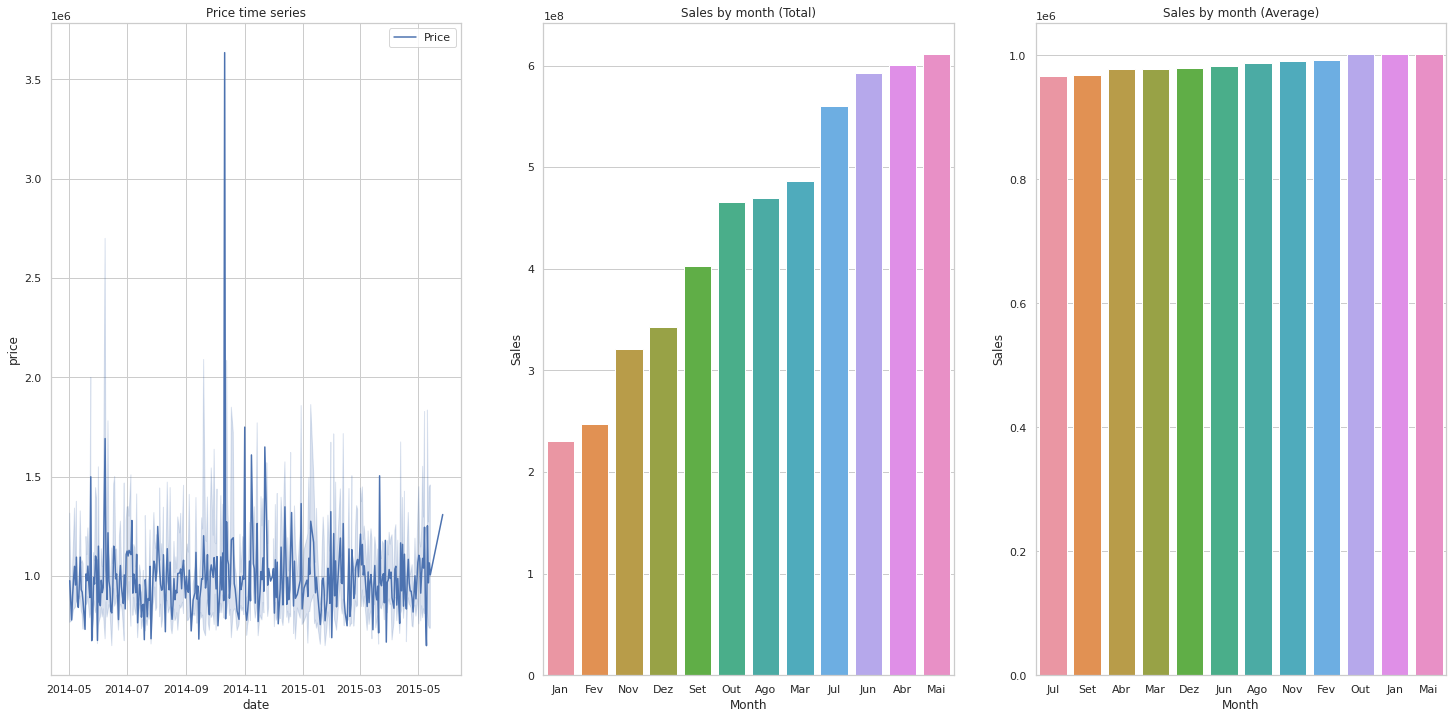

In [73]:
plt.subplot(1,3,1)
sns.lineplot( x='date', y='price', data=aux_high_price, label='Price' )
plt.title('Price time series')


plt.subplot(1,3,2)
aux2 = aux_high_price[['price', 'month']].groupby('month').sum().reset_index()
sns.barplot( x='month', y='price', data = aux2.sort_values(['price']), label='Price' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by month (Total)');

plt.subplot(1,3,3)
aux3 = aux_high_price[['price', 'month']].groupby('month').mean().reset_index()
sns.barplot( x='month', y='price', data = aux3.sort_values(['price']), label='Price' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by month (Average)')

In [78]:
aux3.rename(columns = {'month':'Mês', 'price':'Média de vendas'}, inplace = True)
aux3.sort_values(by = ['Média de vendas'], ascending = False)

,Mês,Média de vendas
7,Mai,1.002321e+06
4,Jan,1.002194e+06
10,Out,1.001930e+06
3,Fev,9.921365e+05
9,Nov,9.910952e+05
1,Ago,9.878158e+05
6,Jun,9.829060e+05
2,Dez,9.805272e+05
8,Mar,9.785495e+05
0,Abr,9.781286e+05
